### Decsion Tree

In [59]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import parallel_coordinates, andrews_curves
import matplotlib.pyplot as plt
import pydotplus

%matplotlib inline

In [60]:
flight= sns.load_dataset('iris')

In [61]:
flight.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,versicolor


In [62]:
flight.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
flight.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


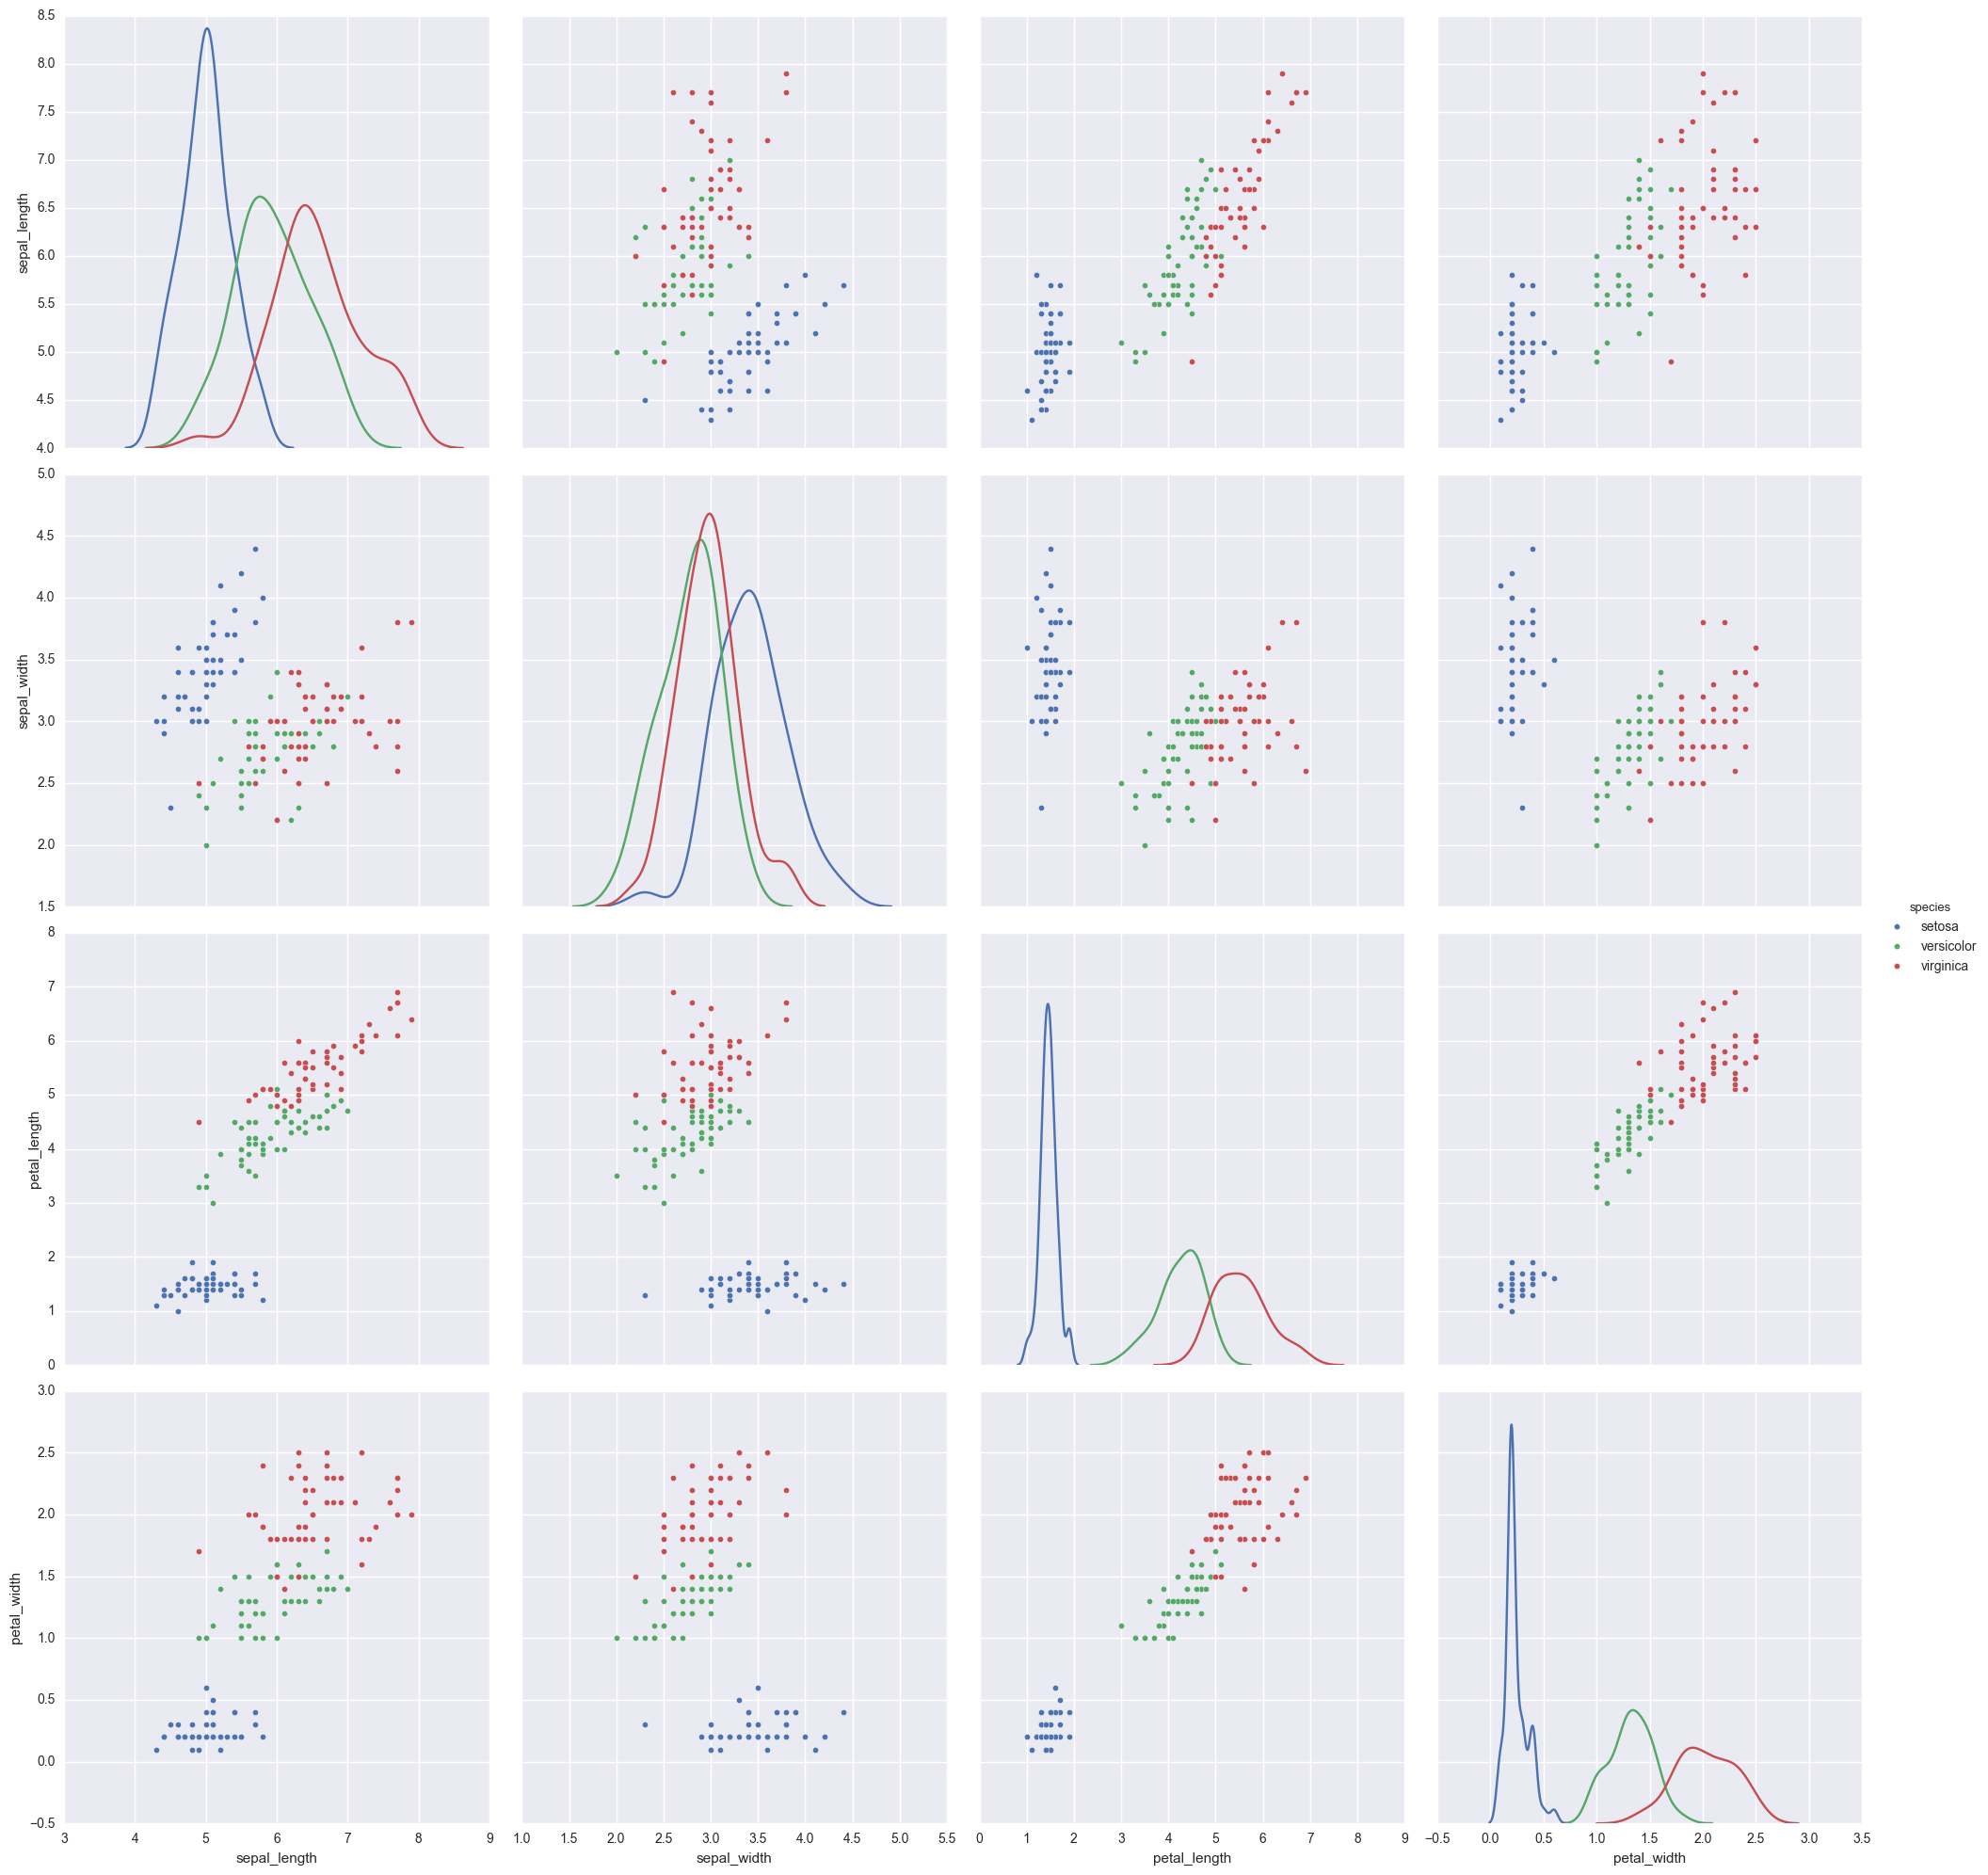

In [64]:
sns.pairplot(flight, hue = 'species', diag_kind = 'kde', size = 5)

In [65]:
encoder = LabelEncoder()
flight['species'] = encoder.fit_transform(flight['species'])

In [66]:
flight.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
82,5.8,2.7,3.9,1.2,1


In [67]:
flight.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
flight.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


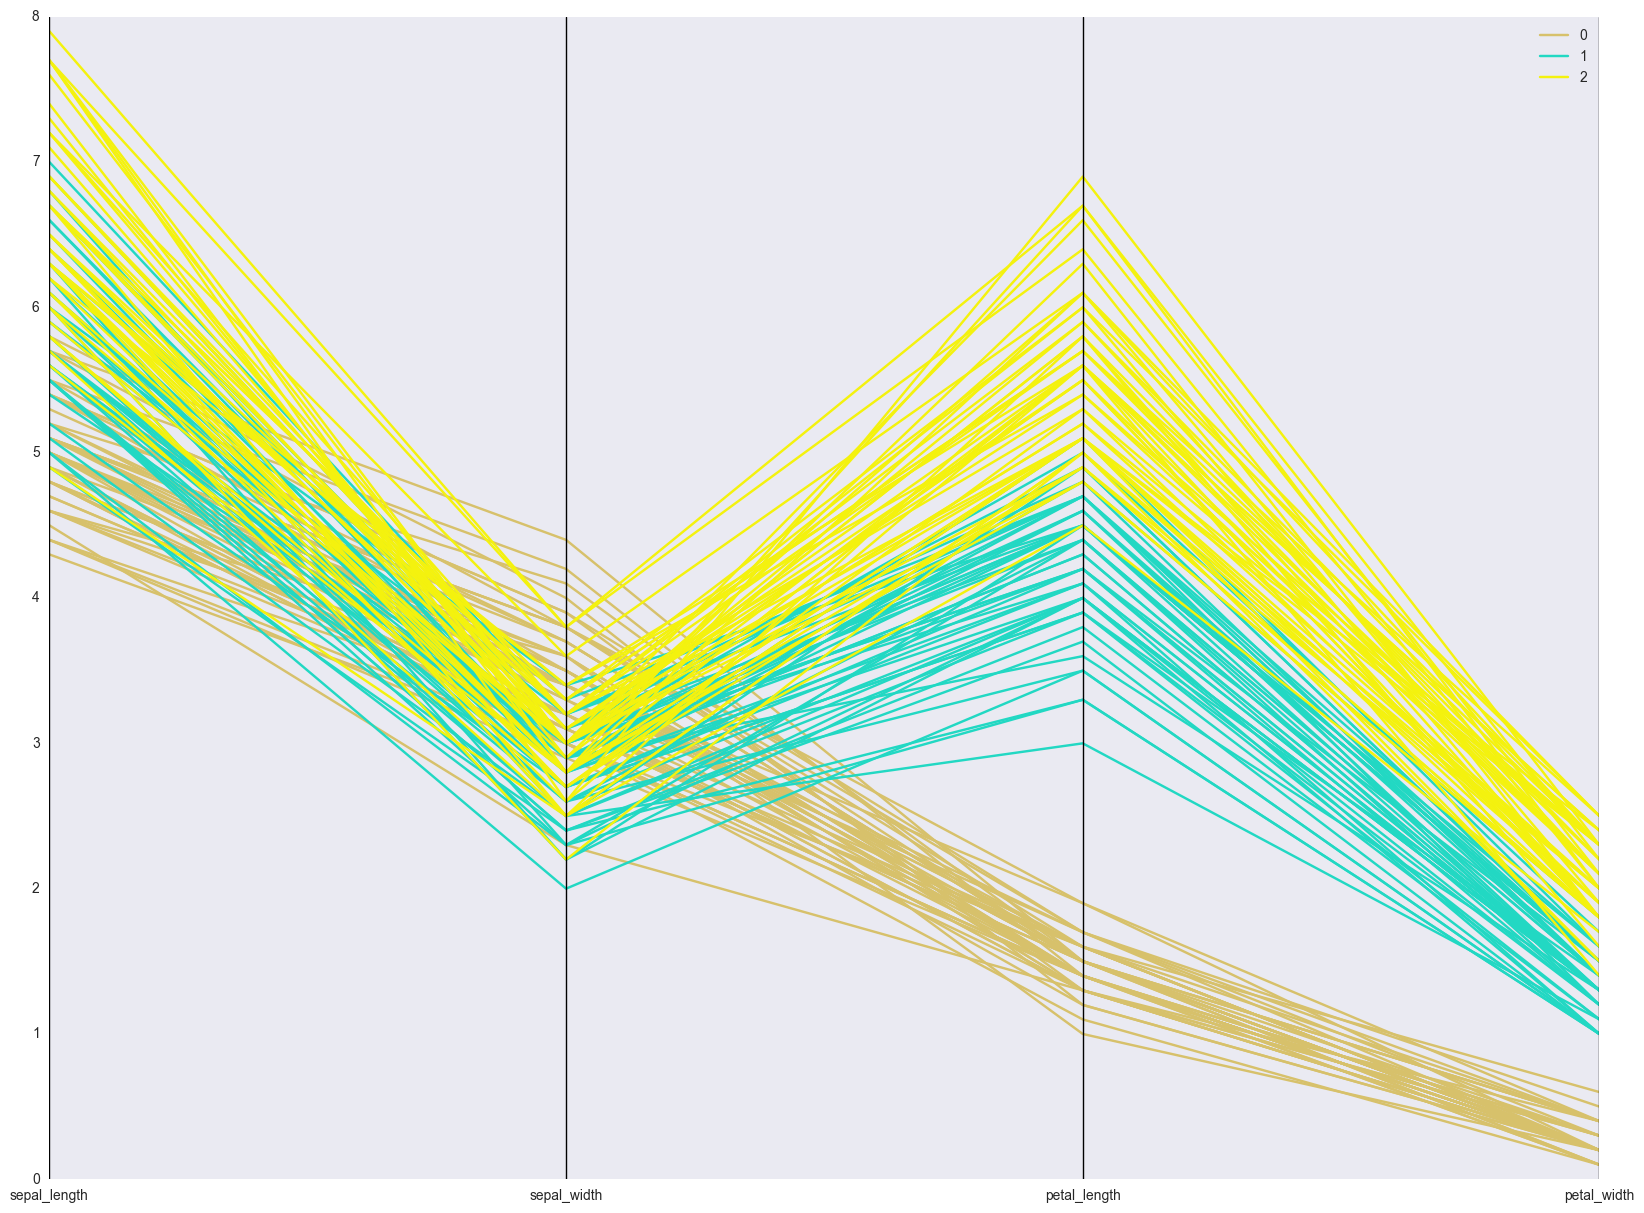

In [69]:
width, height = 20, 15
size = width, height
plt.figure(figsize = size)
parallel_coordinates(flight, 'species')

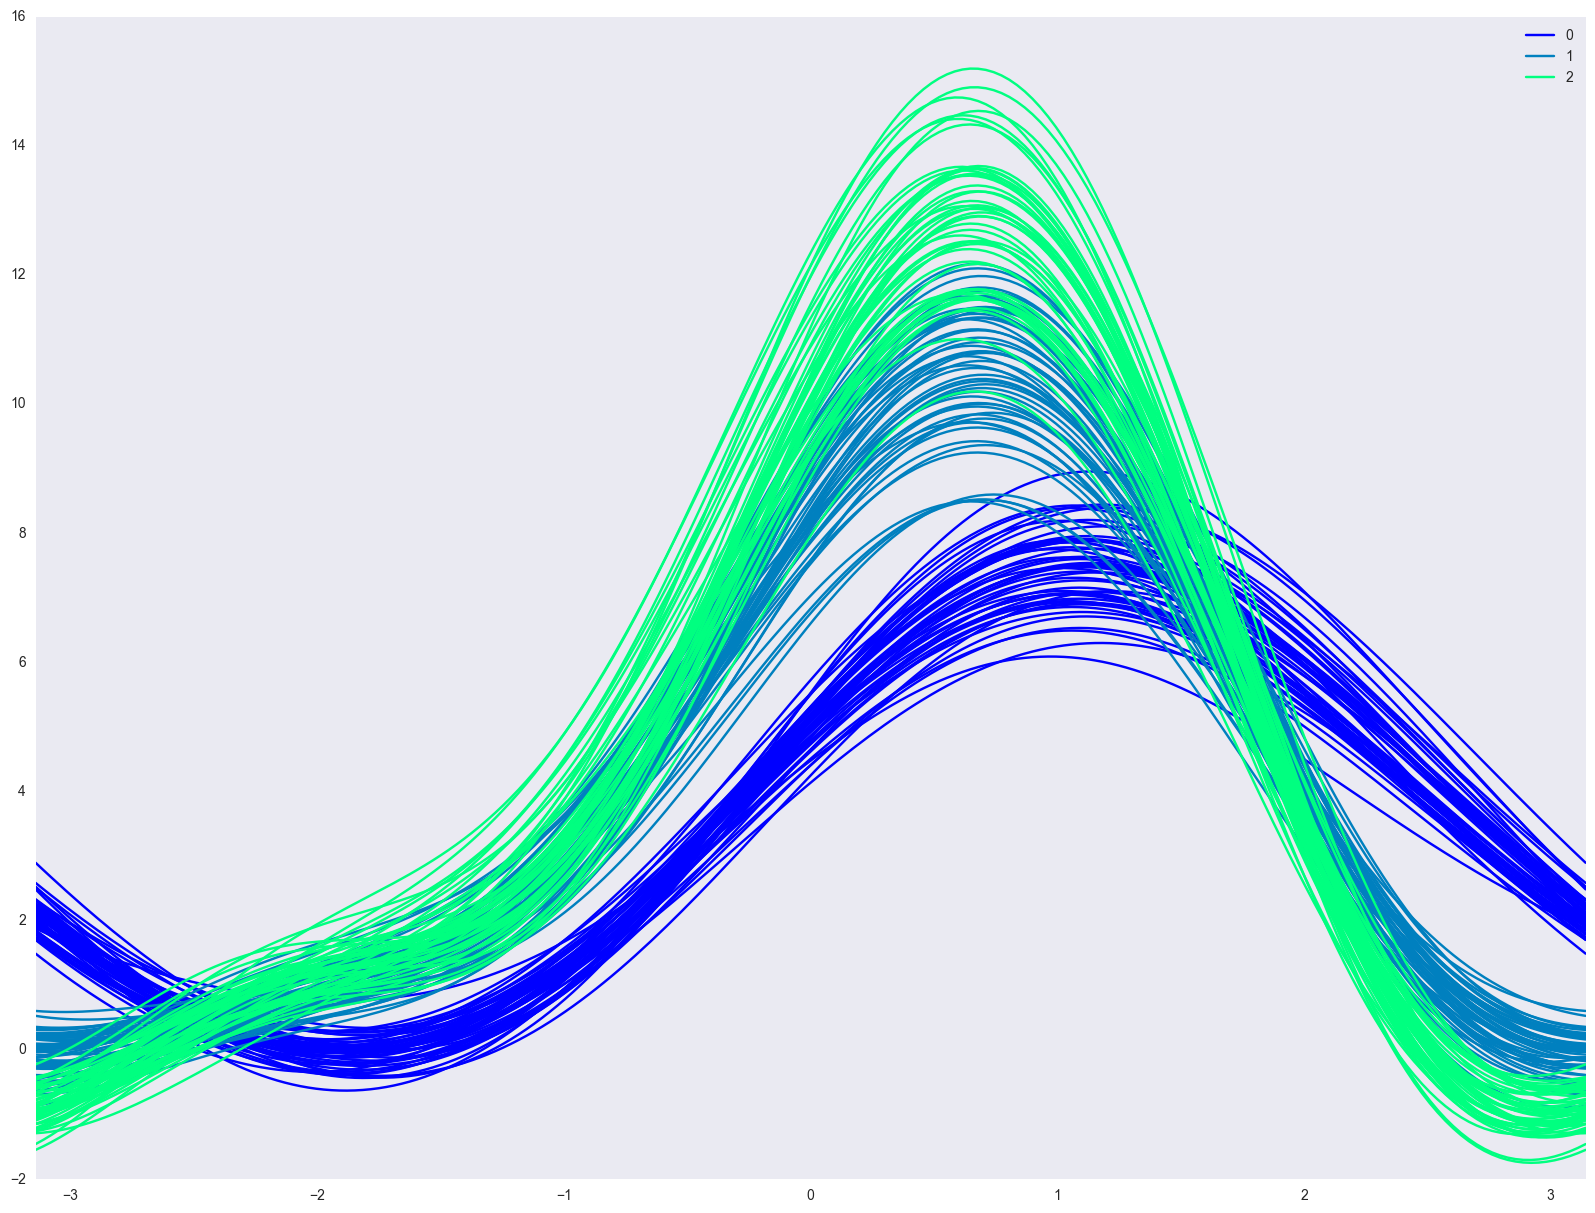

In [70]:
plt.figure(figsize = size)
andrews_curves(flight, 'species', colormap = 'winter')

In [71]:
df = (flight - flight.min()) / (flight.max() - flight.min())
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
27,0.250000,0.625000,0.084746,0.041667,0.0
59,0.250000,0.291667,0.491525,0.541667,0.5
94,0.361111,0.291667,0.542373,0.500000,0.5
49,0.194444,0.541667,0.067797,0.041667,0.0
128,0.583333,0.333333,0.779661,0.833333,1.0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
train, test = train_test_split(flight, train_size = 0.60)

In [74]:
len(train), len(test)

(90, 60)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
features = flight.columns[:-2]
target = flight.columns[ -1]
print(target)

species


In [77]:
model = DecisionTreeClassifier()
model = model.fit(train[features], train[target])

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
predicted = model.predict(test[features])

In [80]:
print('Accuracy Score:', accuracy_score(test[target], predicted) * 100)

Accuracy Score: 93.3333333333


In [81]:
from sklearn.tree import export_graphviz

In [82]:
Class_names = list(set(encoder.inverse_transform(flight[target])))

In [121]:
import plots
plots.show_tree (model, feat_names=features, class_names=Class_names.unique())

ImportError: No module named 'plots'